**Kaggle ML C,ompetition**

**Titanic - Supervised Learning** to predict if recorded passengers survived or not given available data

**Labels =** Survived or Not
- learns on train labels then predicts on test labels

**Target Variables =** variable attempting to predict

**Features or *Predictor Variables* =** all other variables

Percentage correct is accuracy of model

**Approach**
- EDA
- Baseline (quick & dirty model)
- Iterate
- Engineering features
- Choose best performing model

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


%matplotlib inline
sns.set()

In [56]:
traindf = pd.read_csv('data/train.csv')
testdf = pd.read_csv('data/test.csv')
traindf.head(3)
testdf.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Explore Target Variable

In [57]:
# missing values; all should be 891, if no then missing values

traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
# summary stats of numeric data

traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


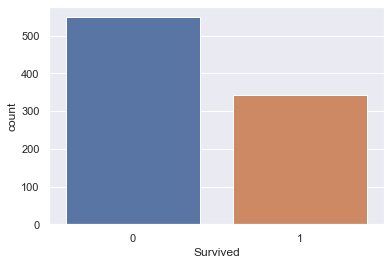

In [59]:
# sns for plot of target
# 0 is dead, 1 is survived so shows more people died

sns.countplot(x='Survived', data=traindf)

Make prediction with Target Variable

In [60]:
# build model predicting 0 SURVIVORS to establish Baseline
# all models need to be better than this
# create col SURVIVED on testdf which encodes all died (0s)

testdf['Survived'] = 0

In [61]:
# save PassengerId & Survived of testdf to csv & submit to Kaggle

testdf[['PassengerId', 'Survived']].to_csv('predictions/no_survivors.csv', index=False)

Kaggle Score: 62%

**EDA of Features / Predictor Variables**

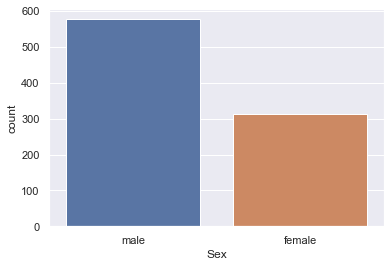

In [62]:
# sns to plot Sex of traindf

sns.countplot(x='Sex', data=traindf)

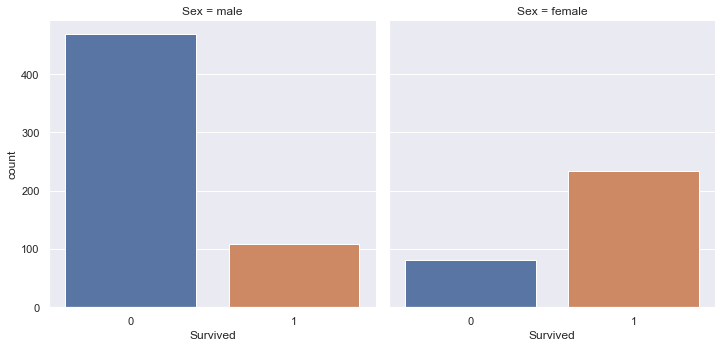

In [63]:
# plot for Survived split over Sex
# shows women more likely to live

sns.catplot(x='Survived', col='Sex', kind='count', data=traindf)

In [64]:
# pandas to calc amount of women & men that survived

traindf.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [65]:
# pandas to calc proportion women survivors vs. men
# 74% women survivors & 19% men

print(traindf[traindf.Sex=='female'].Survived.sum()/traindf[traindf.Sex=='female'].Survived.count())
print(traindf[traindf.Sex=='male'].Survived.sum()/traindf[traindf.Sex=='male'].Survived.count())

0.7420382165605095
0.18890814558058924


Prediction 

In [66]:
# model where ALL women survive & ALL men died

testdf['Survived'] = testdf.Sex=='female'
testdf['Survived'] = testdf.Survived.apply(lambda x: int(x))
testdf.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [67]:
# save PassengerId & Survived of testdf to csv & submit to Kaggle

testdf[['PassengerId', 'Survived']].to_csv('predictions/allwomen_survived.csv', index=False)

Kaggle Score: 

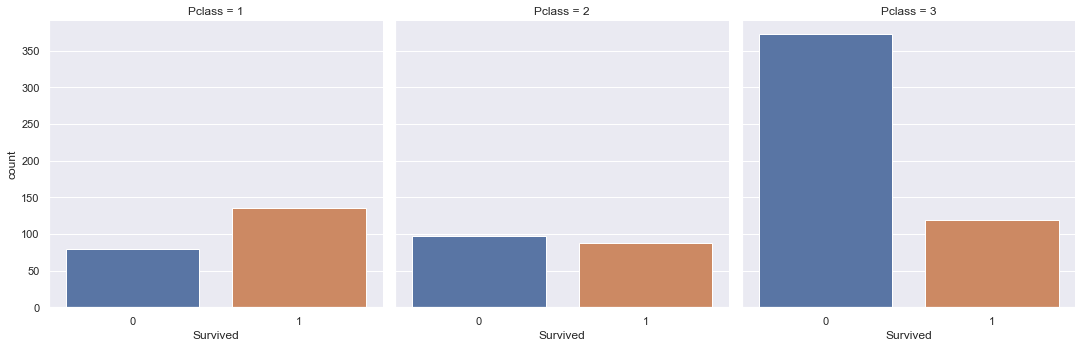

In [68]:
# plot Survived split over Pclass

sns.catplot(x='Survived', col='Pclass', kind='count', data=traindf)

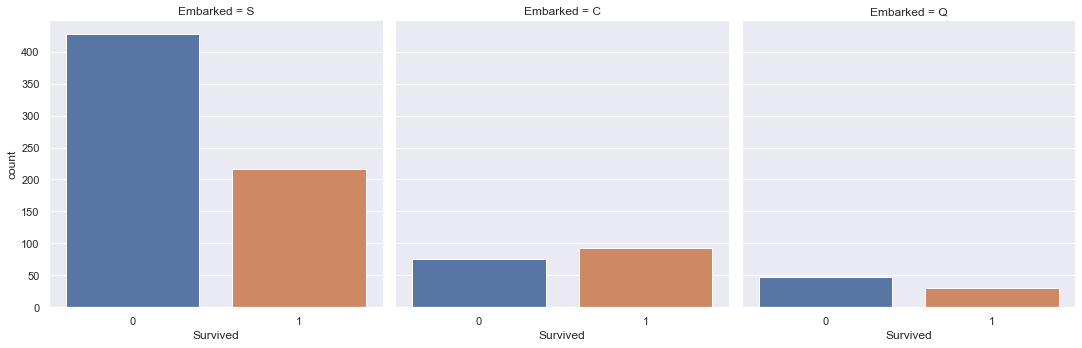

In [69]:
# plot Survived split over Embarked

sns.catplot(x='Survived', col='Embarked', kind='count', data=traindf)

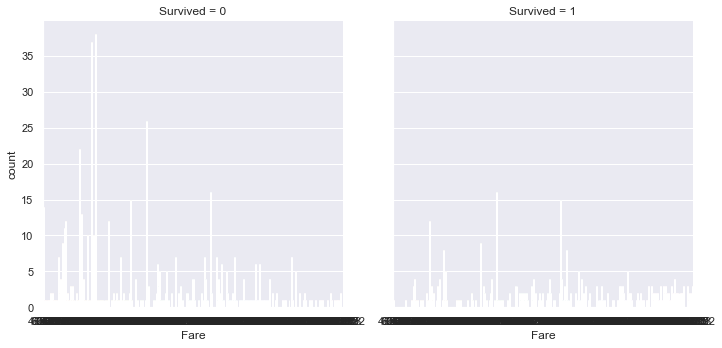

In [70]:
# plot Fare

sns.catplot(x='Fare', col='Survived', kind='count', data=traindf)

In [71]:
#store Target

survived_train = traindf.Survived

In [72]:
# concat training & test datasets

data = pd.concat([traindf.drop(['Survived'], axis=1), testdf])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     418 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [73]:
# impute missing numerical variables

data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     418 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [74]:
# change male & female to num using pandas get_dummies

data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,NaN,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0


In [75]:
# select Sex_male, Fare, Age, Pclass, SibSp to build ML model

data = data[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]
data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   uint8  
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


**Build a Decision Tree Classifier** (ML Model)

In [76]:
# split data back into training & test sets

traindata = data.iloc[:891]
testdata = data.iloc[891:]

In [77]:
# sklearn to transform data into arrays from df

x = traindata.values
test = testdata.values
y = survived_train.values

In [78]:
# instantiate model & fit to data ; clf=classifier

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [79]:
# make prediction on test set & store in Survived col of testdf

y_pred = clf.predict(test)
y_pred = testdf['Survived']

In [84]:
testdf = [['PassengerId', 'Survived']].to_csv('predictions/1st_dectree.csv', index=False)

AttributeError: 'list' object has no attribute 'to_csv'

In [87]:
# split orig training into training & test sets
# to assist choosing ML model hyperparameters

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [88]:
# iterate over values of max_depth ranging from 1-9

dep = np.arange(1,9)

In [89]:
# plot accuracy of models in training & test datasets

train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

In [90]:
# loop over different values of k

for i, k in enumerate(dep):
    clf = tree.DecisionTreeClassifier(max_depth=k)
    clf.fit(x_train, y_train)
    train_accuracy[i] = clf.score(x_train, y_train)
    test_accuracy[i] = clf.score(x_test, y_test)

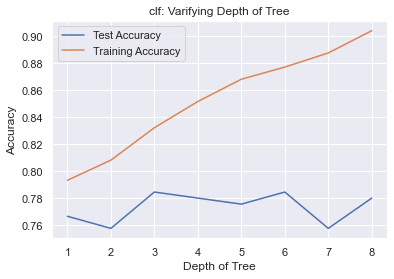

In [91]:
# generate plot

plt.title('clf: Varifying Depth of Tree')
plt.plot(dep, test_accuracy, label='Test Accuracy')
plt.plot(dep, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.show()

**Feature Engineering & ML**

In [93]:
# separately store Target Variable

survived_train = traindf.Survived

In [94]:
# concat training & test datasets

data = pd.concat([traindf.drop(['Survived'], axis=1), testdf])
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


**Feature Engineering** to extract more info from data

In [95]:
# more info about a single col

data.Name.tail(20)

398                     Larsson-Rondberg, Mr. Edvard A
399                           Conlon, Mr. Thomas Henry
400                            Bonnell, Miss. Caroline
401                                    Gale, Mr. Harry
402                     Gibson, Miss. Dorothy Winifred
403                             Carrau, Mr. Jose Pedro
404                       Frauenthal, Mr. Isaac Gerald
405       Nourney, Mr. Alfred (Baron von Drachstedt")"
406                          Ware, Mr. William Jeffery
407                         Widener, Mr. George Dunton
408                    Riordan, Miss. Johanna Hannah""
409                          Peacock, Miss. Treasteall
410                             Naughton, Miss. Hannah
411    Minahan, Mrs. William Edward (Lillian E Thorpe)
412                     Henriksson, Miss. Jenny Lovisa
413                                 Spector, Mr. Woolf
414                       Oliva y Ocana, Dona. Fermina
415                       Saether, Mr. Simon Sivertsen
416       

In [96]:
# extract Titles from Names

data['Title'] = data.Name.apply(lambda x: re.search('([A-Z][a-z]+)\.', x).group(1))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

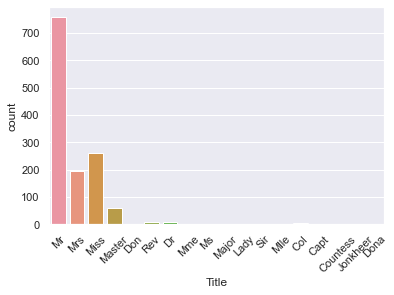

In [98]:
# plot new col

sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)

In [99]:
# ensure data has Title col

data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss


In [100]:
# did passenger have a cabin

data['Has_Cabin'] = ~data.Cabin.isnull()
data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss,False


In [101]:
# drop useless col

data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,NaN,Mr,False
1,1,female,38.0,1,0,71.2833,C,NaN,Mrs,True
2,3,female,26.0,0,0,7.9250,S,NaN,Miss,False


In [102]:
# missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Sex        1309 non-null   object 
 2   Age        1046 non-null   float64
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Fare       1308 non-null   float64
 6   Embarked   1307 non-null   object 
 7   Survived   418 non-null    float64
 8   Title      1309 non-null   object 
 9   Has_Cabin  1309 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 143.5+ KB


In [104]:
# impute missing values for Age, Embarked, Fare

data['Age'] = data.Age.fillna(data.Age.median())
data['Embarked'] = data['Embarked'].fillna('S')
data['Fare'] = data.Fare.fillna(data.Fare.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Sex        1309 non-null   object 
 2   Age        1309 non-null   float64
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Fare       1309 non-null   float64
 6   Embarked   1309 non-null   object 
 7   Survived   418 non-null    float64
 8   Title      1309 non-null   object 
 9   Has_Cabin  1309 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 143.5+ KB


**Bin Numerical Data** with Pandas function qcut

In [105]:
# bin num cols

data['CatAge'] = pd.qcut(data.Age, q=4, labels=False)
data['CatFare'] = pd.qcut(data.Fare, q=4, labels=False)
data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,Has_Cabin,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,S,NaN,Mr,False,0,0
1,1,female,38.0,1,0,71.2833,C,NaN,Mrs,True,3,3
2,3,female,26.0,0,0,7.9250,S,NaN,Miss,False,1,1
3,1,female,35.0,1,0,53.1000,S,NaN,Mrs,True,2,3
4,3,male,35.0,0,0,8.0500,S,NaN,Mr,False,2,1


In [106]:
# drop Age & Fare

data = data.drop(['Age', 'Fare'], axis=1)
data.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Title,Has_Cabin,CatAge,CatFare
0,3,male,1,0,S,NaN,Mr,False,0,0
1,1,female,1,0,C,NaN,Mrs,True,3,3
2,3,female,0,0,S,NaN,Miss,False,1,1


In [108]:
# col for num of fam members onboard

data['FamSize'] = data.SibSp + data.Parch
data.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Survived,Title,Has_Cabin,CatAge,CatFare,FamSize
0,3,male,1,0,S,NaN,Mr,False,0,0,1
1,1,female,1,0,C,NaN,Mrs,True,3,3,1
2,3,female,0,0,S,NaN,Miss,False,1,1,0


**Transform All Variablesinto Numerical Variables**

In [109]:
# transform into binary variables

data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,Pclass,SibSp,Parch,Survived,Has_Cabin,CatAge,CatFare,FamSize,Sex_male,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,3,1,0,NaN,False,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,NaN,True,3,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,0,NaN,False,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,NaN,True,2,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,0,0,NaN,False,2,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


**Build Model with New Dataset**

In [110]:
# split data

data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

In [111]:
# transform into arrays using scikit-learn

x = data_train.values
test = data_test.values
y = survived_train.values # baseline

In [112]:
# setup hyperparameter grid

dep = np.arange(1,9)
param_grid = {'amax_depth':dep}

In [113]:
# instantiate Decision Tree Classifier

clf = tree.DecisionTreeClassifier()

In [117]:
# instantiate GridSearchC object

clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [118]:
# fit grid to data

clf_cv.fit(x,y)

ValueError: Invalid parameter amax_depth for estimator DecisionTreeClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [119]:
# print tuned parameter & score

print("Tuned DT Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [120]:
# make prediction on test set

y_pred = clf_cv.predict(test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [121]:
# new col Survived to store prediction

testdf['Survived'] = y_pred

In [122]:
testdf[['PassengerId', 'Survived']].to_csv('predictions/dec_tree_feat_eng.csv', index=False)

Submit to Kaggle

Accuracy: 78.9